<a href="https://colab.research.google.com/github/ElaiEmylleMatos/challenge-alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [41]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [39]:
faturamento1 = sum(loja['Preço'])
faturamento2 = sum(loja2['Preço'])
faturamento3 = sum(loja3['Preço'])
faturamento4 = sum(loja4['Preço'])

print(f'Faturamento loja 1: R$ {faturamento1:.2f}')
print(f'Faturamento loja 2: R$ {faturamento2:.2f}')
print(f'Faturamento loja 3: R$ {faturamento3:.2f}')
print(f'Faturamento loja 4: R$ {faturamento4:.2f}')

Faturamento loja 1: R$ 1534509.12
Faturamento loja 2: R$ 1488459.06
Faturamento loja 3: R$ 1464025.03
Faturamento loja 4: R$ 1384497.58


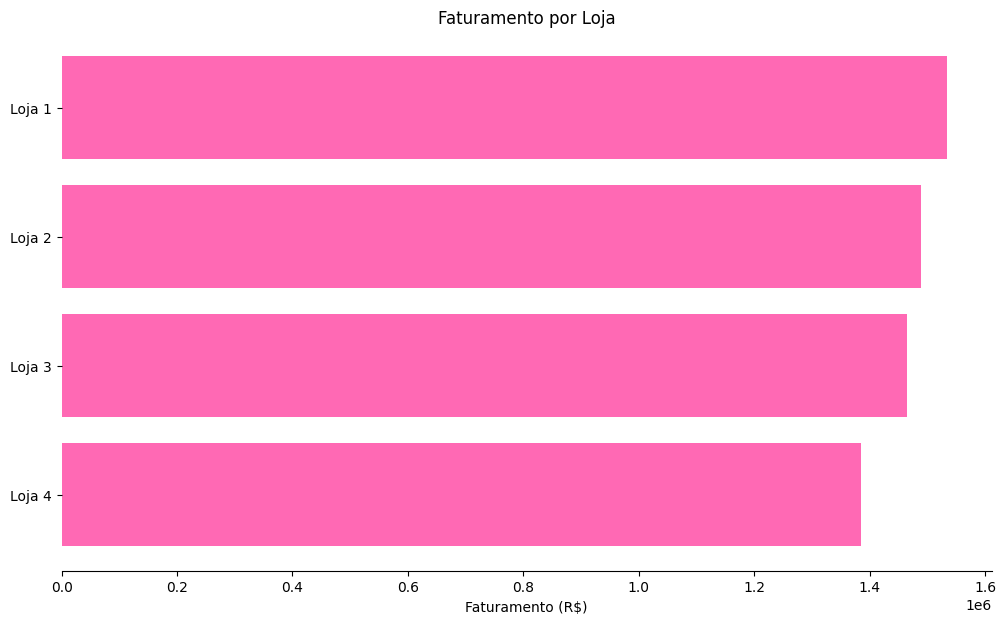

In [52]:
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]

dados_para_ordenar = sorted(zip(faturamentos, lojas_nomes))
faturamentos_ordenados, lojas_nomes_ordenados = zip(*dados_para_ordenar)

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(lojas_nomes_ordenados, faturamentos_ordenados, color='hotpink')

ax.set_title('Faturamento por Loja')
ax.set_xlabel('Faturamento (R$)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


Loja 1 faturou mais.
Loja 4 faturou menos.

# 2. Vendas por Categoria


In [37]:
# dataframe.groupby('coluna_para_agrupar')['coluna_para_calcular'].funcao_de_agregacao()

vendas_categorias1 = loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
vendas_categorias2 = loja2.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
vendas_categorias3 = loja3.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
vendas_categorias4 = loja4.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)


print(f'Total de vendas por categoria na loja 1: \n{vendas_categorias1}')
print(f'\nTotal de vendas por categoria na loja 2: \n{vendas_categorias2}')
print(f'\nTotal de vendas por categoria na loja 3: \n{vendas_categorias3}')
print(f'\nTotal de vendas por categoria na loja 4: \n{vendas_categorias4}')

Total de vendas por categoria na loja 1: 
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64

Total de vendas por categoria na loja 2: 
Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64

Total de vendas por categoria na loja 3: 
Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos        

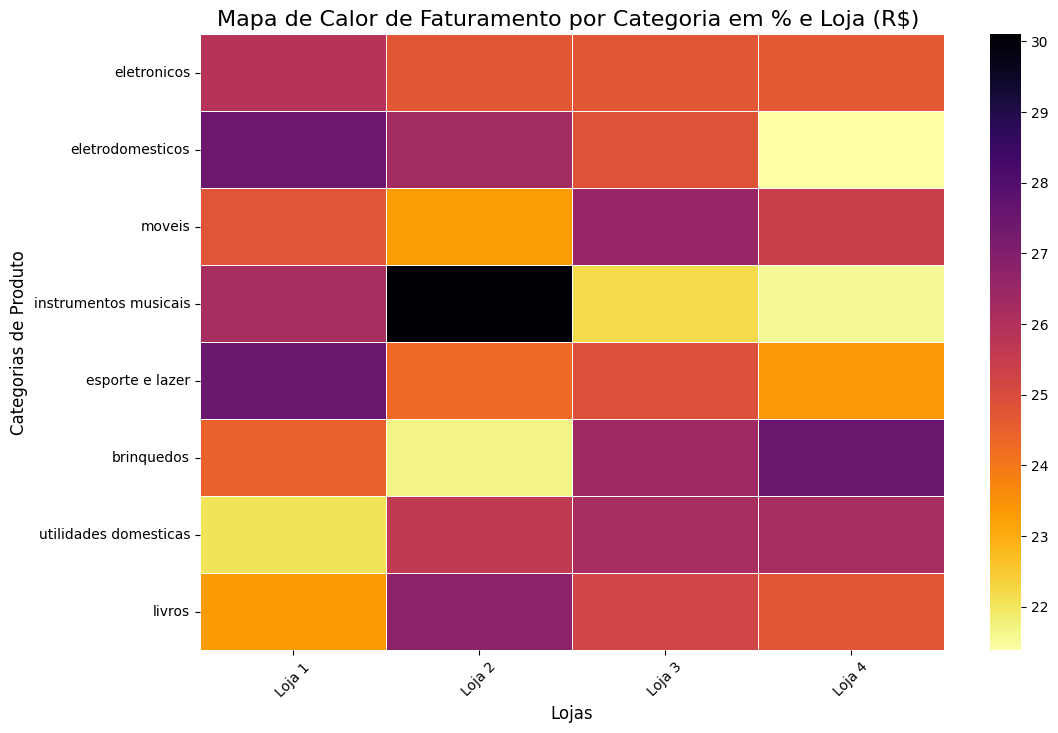

In [65]:
import seaborn as sns

dados_heatmap = {
    'Loja 1': vendas_categorias1,
    'Loja 2': vendas_categorias2,
    'Loja 3': vendas_categorias3,
    'Loja 4': vendas_categorias4
}

df_vendas_consolidadas = pd.DataFrame(dados_heatmap).fillna(0)

# NORMALIZAÇÃO POR CATEGORIA
# Para cada linha, dividimos seu valor pelo total da linha.
# axis=1 soma horizontalmente (calcula o total da categoria)
# axis=0 na divisão alinha o índice (divide cada célula pelo total da sua linha)
df_por_categoria = df_vendas_consolidadas.div(df_vendas_consolidadas.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8)) # Define o tamanho da figura

sns.heatmap(
    df_por_categoria, # Nossos dados consolidados
    annot=False,             # 'annotate' = Escrever os valores nas células
    fmt='.0f',              # Formato dos números: float com 0 casas decimais
    cmap='inferno_r',         # Esquema de cores (outros bons: 'plasma', 'inferno', 'coolwarm')
    linewidths=.5           # Linha branca separando as células
)

plt.title('Mapa de Calor de Faturamento por Categoria em % e Loja (R$) ', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Categorias de Produto', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# 3. Média de Avaliação das Lojas

In [7]:
media_avaliacao1 = loja['Avaliação da compra'].mean()
media_avaliacao2 = loja2['Avaliação da compra'].mean()
media_avaliacao3 = loja3['Avaliação da compra'].mean()
media_avaliacao4 = loja4['Avaliação da compra'].mean()

In [8]:
print(f'Média de avaliação da loja 1: {media_avaliacao1:.2f}')
print(f'Média de avaliação da loja 2: {media_avaliacao2:.2f}')
print(f'Média de avaliação da loja 3: {media_avaliacao3:.2f}')
print(f'Média de avaliação da loja 4: {media_avaliacao4:.2f}')

Média de avaliação da loja 1: 3.98
Média de avaliação da loja 2: 4.04
Média de avaliação da loja 3: 4.05
Média de avaliação da loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [27]:
def portugues(prod):
  artigo = "Os" if len(prod) > 1 else "O"
  nprod = "produtos" if len(prod) > 1 else "produto"
  vend = "vendidos" if len(prod) > 1 else "vendido"
  verbo = "são" if len(prod) > 1 else "é"
  return [artigo, nprod, vend, verbo]

def vendas_loja(df_loja, nome_loja):
  print(f'\n------------------------------{nome_loja}------------------------------:\n')
  loja_count = df_loja.groupby('Produto')['Preço'].count()
  valor_maximo = loja_count.max()
  valor_minimo = loja_count.min()

  mais_vendidos = loja_count[loja_count == valor_maximo]
  menos_vendidos = loja_count[loja_count == valor_minimo]

  nomes_mais_vendidos = ", ".join(mais_vendidos.index.tolist())
  nomes_menos_vendidos = ", ".join(menos_vendidos.index.tolist())

  plural_mais = portugues(mais_vendidos)
  plural_menos = portugues(menos_vendidos)

  print(f'{plural_mais[0]} {plural_mais[1]} mais {plural_mais[2]} na {nome_loja} {plural_mais[3]}: {nomes_mais_vendidos}.')
  print(f'{plural_menos[0]} {plural_menos[1]} menos {plural_menos[2]} na {nome_loja} {plural_menos[3]}: {nomes_menos_vendidos}.\n')

vendas_loja(loja, "Loja 1")
vendas_loja(loja2, "Loja 2")
vendas_loja(loja3, "Loja 3")
vendas_loja(loja4, "Loja 4")



------------------------------Loja 1------------------------------:

Os produtos mais vendidos na Loja 1 são: Guarda roupas, Micro-ondas, TV Led UHD 4K.
Os produtos menos vendidos na Loja 1 são: Celular ABXY, Headset.


------------------------------Loja 2------------------------------:

O produto mais vendido na Loja 2 é: Iniciando em programação.
O produto menos vendido na Loja 2 é: Jogo de tabuleiro.


------------------------------Loja 3------------------------------:

O produto mais vendido na Loja 3 é: Kit banquetas.
O produto menos vendido na Loja 3 é: Blocos de montar.


------------------------------Loja 4------------------------------:

O produto mais vendido na Loja 4 é: Cama box.
O produto menos vendido na Loja 4 é: Guitarra.



# 5. Frete Médio por Loja


In [53]:
frete_medio1 = loja['Frete'].mean()
frete_medio2 = loja2['Frete'].mean()
frete_medio3 = loja3['Frete'].mean()
frete_medio4 = loja4['Frete'].mean()


print(f'Frete médio da loja 1: R$ {frete_medio1:.2f}')
print(f'Frete médio da loja 2: R$ {frete_medio2:.2f}')
print(f'Frete médio da loja 3: R$ {frete_medio3:.2f}')
print(f'Frete médio da loja 4: R$ {frete_medio4:.2f}')

Frete médio da loja 1: R$ 34.69
Frete médio da loja 2: R$ 33.62
Frete médio da loja 3: R$ 33.07
Frete médio da loja 4: R$ 31.28


In [55]:

frete_geral = (frete_medio1 + frete_medio2 + frete_medio3 + frete_medio4) / 4

print(f'Frete médio geral: R$ {frete_geral:.2f}')

Frete médio geral: R$ 33.17
